# Concevez une application de santé publique

## Nettoyage des données

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [3]:
os.getcwd()

'c:\\Users\\doare\\OneDrive\\Bureau\\IML_Projet_2'

In [4]:
os.chdir('c:\\Users\\doare\\OneDrive\\Bureau\\IML_Projet_2')

#### Dictionnaire de fonction

In [5]:
# Création d'une fonction pour supprimer les valeurs manquantes par colonne
def supprimer_colonne_vide(data : pd.DataFrame , pourcentage_val_manquantes : float) -> pd.DataFrame:
    """
    Fonction pour supprimer des colonnes en spécifiant le pourcentage de valeurs manquantes dans la colonne
    """
    colonne_a_garder = []
    for colonne in data.columns:
        if data[colonne].isna().sum()/data.shape[0] <= pourcentage_val_manquantes:
            colonne_a_garder.append(colonne)
    return data[colonne_a_garder]

# Création fonction pour observer les valeurs manquantes par colonne
def pourcentage_val_manquantes(data : pd.DataFrame):
    """
    Fonction qui sort un DataFrame avec 3 colonnes, les variables, le pourcentage de valeurs manquantes par variable et le nombre de valeurs manquantes
    """
    dataframe = pd.DataFrame(columns=['Variable', 'Pourcentage_valeurs_manquantes','Valeurs_manquantes'])
    dataframe['Variable'] = data.columns
    val_manquantes = list()
    val_manquantes_pourcentage = list()
    for col in data.columns:
        val1 = data[col].isna().sum().sum()
        val2 = data[col].isna().sum()/data.shape[0]
        val_manquantes.append(val1)
        val_manquantes_pourcentage.append(val2)
    dataframe['Pourcentage_valeurs_manquantes'] = list(val_manquantes_pourcentage)
    dataframe['Valeurs_manquantes'] = list(val_manquantes)
        
    return dataframe.sort_values(by = 'Pourcentage_valeurs_manquantes', ascending = False)

# Création fonction pour observer sous forme de graphique en bar le % de valeurs manquantes par colonne
def plot_pourcentage_val_manquantes_par_variable(data: pd.DataFrame, sample=False):
    """
    Mettre un échantillon du jeu de données si le dataset est trop lourd
    Permet d'afficher le pourcentage de valeur manquantes/non manquantes par variable sous forme de graphique en bar
    """
    if sample:
        subdata = data.sample(frac=0.5)
    else:
        subdata = data
    sns.displot(data=subdata.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=3.25)
    plt.gcf().set_size_inches(20, 30)


#Remplacer valeur manquantes pas un string
def remplacer_valeurs_manquantes_string(data: pd.DataFrame, colonne: str, valeur: str) -> pd.DataFrame:
    """
    Renseigner le jeu de données ainsi que la colonne dans laquelle on veut remplacer les valeurs. Enfin, il faut écrire par quoi on veut remplacer les valeurs manquantes
    """
    data[colonne] = data[colonne].fillna(valeur)

In [49]:
df = pd.read_csv('en.openfoodfacts.org.products (1).csv', sep='\t')
df.shape

Nous avons beaucoup de colonnes et plusieurs ont l'air vide ou du moins comporter beaucoup de valeurs manquantes. On va donc venir supprimer les colonnes inutiles afin de réduire nos variables.

In [7]:
#Visualisation de nombre de valeurs manquantes par colonne
#plot_pourcentage_val_manquantes_par_variable(df, sample=True)

In [8]:
df_prep = supprimer_colonne_vide(df, .9)
df_prep.shape

(2810388, 74)

Après avoir supprimer les colonnes les plus vides (au moins 90%) de valeurs manquantes on passe de 200 colonnes à 74. Cependant beaucoup d'entre elles possèdent encore de nombreuses valeurs manquantes. On va donc essayer de réduire ce nombre de variable et également choisir des produits qui ont assez d'informations.

In [9]:
_ = pourcentage_val_manquantes(df_prep)
_.head(50)

,Variable,Pourcentage_valeurs_manquantes,Valeurs_manquantes
44,brand_owner,0.895597,2516974
12,packaging_en,0.867410,2437758
11,packaging_tags,0.867410,2437758
10,packaging,0.867404,2437741
21,stores,0.866912,2436358
32,additives_en,0.832699,2340206
31,additives_tags,0.832699,2340206
29,serving_quantity,0.793123,2228983
28,serving_size,0.790104,2220499
45,ecoscore_score,0.769712,2163189


Afin de se rendre mieux comprendre des variables, nous allons nous focaliser sur un produit. Nous allons regarder sur le ketchup.

In [10]:
df_ketchup = df_prep[(df_prep['product_name'] == 'Ketchup')]
df_ketchup.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
5104,0008295660954,http://world-en.openfoodfacts.org/product/0008...,kiliweb,1598450144,2020-08-26T13:55:44Z,1598450272,2020-08-26T13:57:52Z,roboto-app,Ketchup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26936,0012300296953,http://world-en.openfoodfacts.org/product/0012...,foodvisor,1650298830,2022-04-18T16:20:30Z,1650298831,2022-04-18T16:20:31Z,foodvisor,Ketchup,NaN,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27964,0013000009836,http://world-en.openfoodfacts.org/product/0013...,kiliweb,1649866874,2022-04-13T16:21:14Z,1672718329,2023-01-03T03:58:49Z,wolfgang8741,Ketchup,32 oz,...,0.0,0.0,29.411765,23.529412,0.0,0.0,2.647059,1.058824,NaN,16.0
33981,15400056397,http://world-en.openfoodfacts.org/product/0015...,usda-ndb-import,1489062650,2017-03-09T12:30:50Z,1587578157,2020-04-22T17:55:57Z,org-database-usda,Ketchup,NaN,...,0.0,0.0,23.530000,23.530000,0.0,0.0,2.205000,0.882000,12.5,15.0
50423,20601412828,http://world-en.openfoodfacts.org/product/0020...,org-database-usda,1587662792,2020-04-23T17:26:32Z,1587662792,2020-04-23T17:26:32Z,org-database-usda,Ketchup,NaN,...,0.0,0.0,23.530000,23.530000,0.0,0.0,2.205000,0.882000,0.0,15.0


In [11]:
df_prod_sans_na = df_prep[df_prep["product_name"].notna() & df_prep["nutriscore_grade"].notna() & df_prep["pnns_groups_1"].notna() & df_prep["main_category_en"].notna() & df_prep["nova_group"].notna() & df_prep["ecoscore_grade"].notna()]

print(f"Nombre de lignes ou nous avons des données essentielles: {df_prod_sans_na.shape[0]} produits soit {df_prod_sans_na.shape[0]/df_prep.shape[0]*100:.2f}% de notre jeu de données de base.")

Nombre de lignes ou nous avons des données essentielles: 552777 produits soit 19.67% de notre jeu de données de base.


In [12]:
_ = pourcentage_val_manquantes(df_prod_sans_na)
pd.set_option('display.max_rows', None)
_.head(74)

,Variable,Pourcentage_valeurs_manquantes,Valeurs_manquantes
21,stores,0.698218,385959
10,packaging,0.633207,350022
12,packaging_en,0.633205,350021
11,packaging_tags,0.633205,350021
18,labels,0.629874,348180
20,labels_en,0.629874,348180
19,labels_tags,0.629874,348180
44,brand_owner,0.572763,316610
48,product_quantity,0.531954,294052
50,popularity_tags,0.525398,290428


Parmi les 74 variables restantes, elles ont presque toutes moins de 60% de valeurs manquantes ce qui est acceptable pour la suite. 

In [13]:
#Regarder valeur présentes dans la colonne
df_prod_sans_na['countries_en'].unique()

array(['France', 'United States', 'Canada', ...,
       'Algeria,Egypt,Malaysia,Morocco,Saudi Arabia,Syria,Tunisia',
       'Bolivia,Ireland', 'Bulgaria,Cyprus,Czech Republic,Greece'],
      dtype=object)

Nous allons garder des colonnes qui contiennent :
   <br> - des informations générales sur le produit (product_name, brands, pnns_groups, localisation )
   <br> - des informations environnementales (packaging, huile de palme)
   <br> - des informations sur la qualité du produit (additifs, infos nutritionnels tels que le nutriscore et les variables quantitatives pour 100g )



In [14]:
df_filtre = df_prod_sans_na.loc[:, ["code","product_name","brands", "pnns_groups_1","categories","main_category_en", "countries_en","sugars_100g","salt_100g","sodium_100g","proteins_100g","energy_100g","energy-kcal_100g",
"carbohydrates_100g","saturated-fat_100g","fat_100g","additives_n","nutriscore_grade","nova_group","ecoscore_grade"]]

In [15]:
df_filtre.shape

(552777, 20)

In [16]:
df_filtre.head()

,code,product_name,brands,pnns_groups_1,categories,main_category_en,countries_en,sugars_100g,salt_100g,sodium_100g,proteins_100g,energy_100g,energy-kcal_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,additives_n,nutriscore_grade,nova_group,ecoscore_grade
79,0000000005470,BAguette bressan,Crousresto',Cereals and potatoes,"Aliments et boissons à base de végétaux, Alime...",Baguettes,France,0.60,0.3580,0.1432,9.5,669.0,160.0,25.20,0.5,2.2,3.0,a,4.0,b
195,000000002946,Pâte a tartiner,La pata yan,Sugary snacks,"Petit-déjeuners, Produits à tartiner, Produits...",Hazelnut spreads,France,40.20,0.2000,0.0800,0.0,1946.0,465.0,41.00,6.0,39.5,1.0,e,4.0,d
303,0000000043595,Cranberries,Torn & Glasser,Fruits and vegetables,"Plant-based foods and beverages, Plant-based f...",Cranberries,United States,66.67,0.0000,0.0000,0.0,1255.0,300.0,83.33,0.0,0.0,0.0,c,3.0,d
354,000000022524,Huile d'olive de Nîmes vierge extra,NaN,Fat and sauces,"Aliments et boissons à base de végétaux, Alime...",Huile-d-olive-vierge-extra,France,0.00,0.0025,0.0010,0.0,3443.0,823.0,0.00,12.6,91.5,NaN,c,2.0,d
361,0000000274722,Blanquette de Volaille et son Riz,Comme J’aime,Composite foods,"Plats préparés, en:meat-based-products, Plats ...",Turkey dishes,France,0.50,0.7000,0.2800,6.8,450.0,NaN,15.30,0.9,2.2,2.0,b,4.0,c


Maintenant que nous avons notre jeu de données avec les colonnes que l'on souhaite garder, nous pouvons passer au nettoyage de ces donneés. Dans un premier temps, nous observerons le type de nos variables et les corriger si besoin. Ensuite, nous verrons si nous avons des outliers et comment les gérer et enfin nous allons gérer les valeurs manquantes.
<br>
<br>

## Nettoyage des données

#### Gérer le type de nos variables

In [17]:
#Type de nos variables
df_filtre.dtypes

code                   object
product_name           object
brands                 object
pnns_groups_1          object
categories             object
main_category_en       object
countries_en           object
sugars_100g           float64
salt_100g             float64
sodium_100g           float64
proteins_100g         float64
energy_100g            object
energy-kcal_100g      float64
carbohydrates_100g    float64
saturated-fat_100g    float64
fat_100g              float64
additives_n           float64
nutriscore_grade       object
nova_group            float64
ecoscore_grade         object
dtype: object

On peut voir que notre variable energy_100g est mal formaté, on va donc la transformer en float ainsi que nos variables sur les scores, nous allons les mettre en type catégorie.

In [18]:
df_filtre['energy_100g'] = df_filtre['energy_100g'].astype('float64')
df_filtre['nutriscore_grade'] = df_filtre['nutriscore_grade'].astype("category")
df_filtre['ecoscore_grade'] = df_filtre['ecoscore_grade'].astype("category")
df_filtre['nova_group'] = df_filtre['nova_group'].astype("category")
df_filtre['pnns_groups_1'] = df_filtre['pnns_groups_1'].astype("category")
df_filtre['code'] = df_filtre['code'].astype("str")
df_filtre['product_name'] = df_filtre['product_name'].astype("str")


In [19]:
df_filtre.dtypes

code                    object
product_name            object
brands                  object
pnns_groups_1         category
categories              object
main_category_en        object
countries_en            object
sugars_100g            float64
salt_100g              float64
sodium_100g            float64
proteins_100g          float64
energy_100g            float64
energy-kcal_100g       float64
carbohydrates_100g     float64
saturated-fat_100g     float64
fat_100g               float64
additives_n            float64
nutriscore_grade      category
nova_group            category
ecoscore_grade        category
dtype: object

In [20]:
df_filtre['pnns_groups_1'].value_counts()

Sugary snacks              102779
unknown                     94837
Cereals and potatoes        58962
Milk and dairy products     57736
Fat and sauces              52067
Fish Meat Eggs              48149
Beverages                   41749
Composite foods             40595
Fruits and vegetables       34090
Salty snacks                21759
Alcoholic beverages            54
Name: pnns_groups_1, dtype: int64

On peut voir qu'il y a une catégorie 'unknow', on va donc venir la supprimer 

In [21]:
df_filtre = df_filtre.drop(df_filtre[df_filtre['pnns_groups_1']=='unknown'].index)

#### Gestion des outliers

In [22]:
df_filtre.describe()

,sugars_100g,salt_100g,sodium_100g,proteins_100g,energy_100g,energy-kcal_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,additives_n
count,455809.000000,4.562510e+05,4.562510e+05,455838.000000,455883.000000,427755.000000,455689.000000,455683.000000,455838.000000,440880.000000
mean,13.990205,2.203400e+02,8.813611e+01,7.480464,1173.746304,282.719464,28.869872,5.763719,17.258500,2.150690
std,149.468921,1.480465e+05,5.921859e+04,9.774407,853.993687,205.796473,151.142633,148.400577,1481.254028,2.953127
min,-1.000000,0.000000e+00,0.000000e+00,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.820000,7.500000e-02,3.000000e-02,1.250000,418.000000,100.000000,4.100000,0.020000,0.900000,0.000000
50%,4.120000,5.625000e-01,2.250000e-01,5.400000,1101.000000,267.000000,15.000000,1.800000,7.060000,1.000000
75%,20.000000,1.275000e+00,5.098387e-01,10.610000,1682.000000,404.000000,54.000000,8.000000,22.350000,3.000000
max,99999.000000,1.000000e+08,4.000000e+07,3000.000000,31246.000000,11067.000000,99999.000000,99999.000000,999999.000000,39.000000


Premièrement, on peut voir que certaines valeurs sont négatives, on va donc les supprimer. De plus, On observe que les valeurs maximum de nos variables sont supérieurs à 100 or ce sont des données pour 100g. On va donc supprimer toutes ces données aberrantes. Concernant les variables sur l'energie, ils ne s'expriment pas en g. les valeurs sont donc supérieur à 100 c'est normal.

In [23]:
#Supprimer donénes aberrantes 
colonne_100g = ['sugars_100g','salt_100g','sodium_100g','proteins_100g','carbohydrates_100g','saturated-fat_100g','fat_100g']
df_copie = df_filtre.copy()
for col in colonne_100g:
    df_copie = df_copie.loc[((df_copie[col]>=0)&(df_copie[col]<=100)) | (df_copie[col].isna()),:]
df_copie.describe()

,sugars_100g,salt_100g,sodium_100g,proteins_100g,energy_100g,energy-kcal_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,additives_n
count,455587.000000,456029.000000,456029.000000,455616.000000,455661.000000,427574.000000,455470.000000,455461.000000,455616.000000,440664.000000
mean,13.746044,0.942849,0.377244,7.462019,1173.484415,282.658313,28.597876,5.540028,15.055685,2.150300
std,19.474299,1.880577,0.755810,7.904850,852.449355,205.560993,28.133181,8.854170,20.466891,2.952763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.820000,0.075000,0.030000,1.240000,418.000000,100.000000,4.100000,0.020000,0.900000,0.000000
50%,4.117647,0.560000,0.224000,5.400000,1100.000000,267.000000,15.000000,1.800000,7.060000,1.000000
75%,20.000000,1.272500,0.509000,10.606061,1682.000000,404.000000,54.000000,8.000000,22.350000,3.000000
max,100.000000,100.000000,49.987200,100.000000,31246.000000,11067.000000,100.000000,100.000000,100.000000,39.000000


Après avoir néttoyé les données aberrantes, nous allons analyser les outliers et traiters les outliers avant de remplacer nos valeurs manquantes.

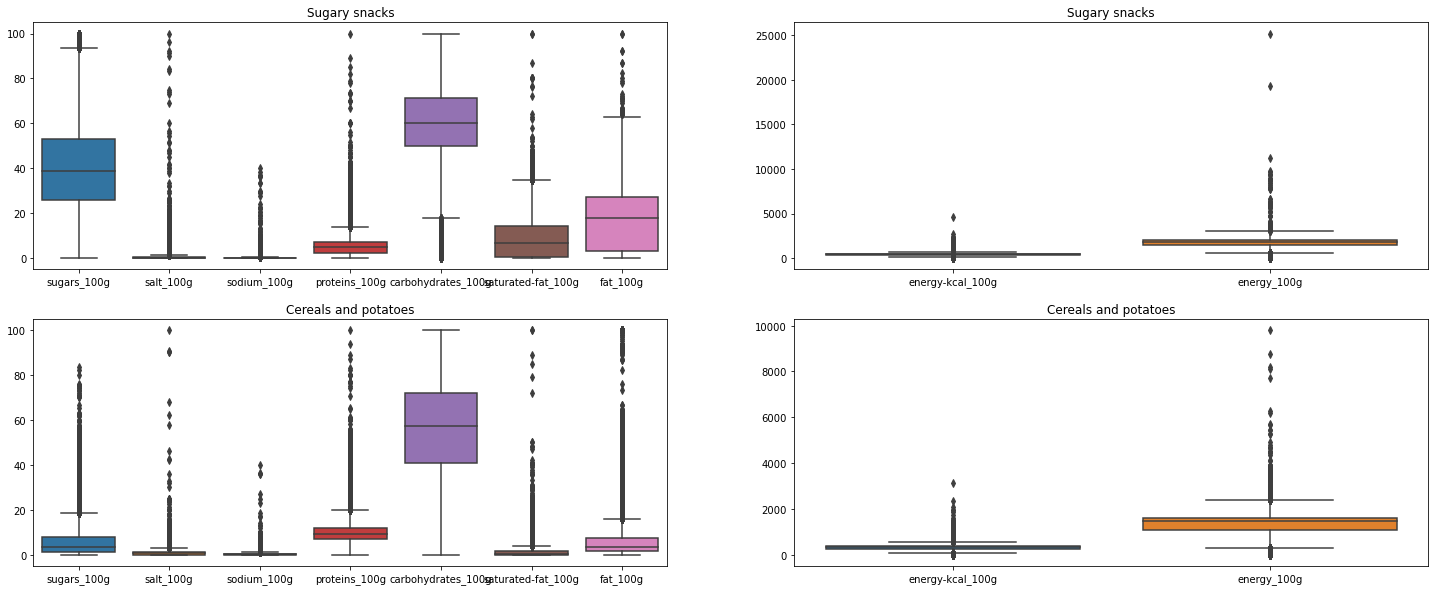

In [24]:
colonne_100g_V2 = ['pnns_groups_1','sugars_100g','salt_100g','sodium_100g','proteins_100g','carbohydrates_100g','saturated-fat_100g','fat_100g']

df_boxplot2 = df_copie[colonne_100g_V2]
df_boxplot_sugary = df_boxplot2.loc[df_boxplot2['pnns_groups_1'].str.contains('Sugary snacks'),:]
df_boxplot_cereales = df_boxplot2.loc[df_boxplot2['pnns_groups_1'].str.contains('Cereals and potatoes'),:]

colonne_energy = ['pnns_groups_1','energy-kcal_100g','energy_100g']
df_energy = df_copie[colonne_energy]
df_boxplot_energy_sugary = df_energy.loc[df_energy['pnns_groups_1'].str.contains('Sugary snacks'),:]
df_boxplot_enery_cereales = df_energy.loc[df_energy['pnns_groups_1'].str.contains('Cereals and potatoes'),:]

plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Sugary snacks')
sns.boxplot(data=df_boxplot_sugary)

plt.subplot(2,2,3)
plt.title('Cereals and potatoes')
sns.boxplot(data=df_boxplot_cereales)

plt.subplot(2,2,2)
plt.title('Sugary snacks')
sns.boxplot(data=df_boxplot_energy_sugary)

plt.subplot(2,2,4)
plt.title('Cereals and potatoes')
sns.boxplot(data=df_boxplot_enery_cereales)

plt.show()

On peut oir que nos variables pour 100g possède de nombreux outleirs, nous allons donc borner ces données afin d'avoir un jeu de données plus propre.

In [25]:
colonne_100g_borne_outliers = ['sugars_100g','salt_100g','sodium_100g','proteins_100g','carbohydrates_100g','saturated-fat_100g','fat_100g', 'energy-kcal_100g','energy_100g', 'additives_n']

# Groupement par catégorie
categorie = df_copie['pnns_groups_1'].unique().tolist()
print(categorie)

['Cereals and potatoes', 'Sugary snacks', 'Fruits and vegetables', 'Fat and sauces', 'Composite foods', 'Milk and dairy products', 'Salty snacks', 'Beverages', 'Fish Meat Eggs', 'Alcoholic beverages']


In [26]:
for var in colonne_100g_borne_outliers:
    for categ in categorie:
        Q1 = df_copie.loc[df_copie['pnns_groups_1'] == categ, var].quantile(0.25)
        Q3 = df_copie.loc[df_copie['pnns_groups_1'] == categ, var].quantile(0.75)
        IQR = Q3 - Q1
        borne_inférieur = Q1 - 1.5 * IQR
        borne_supérieur = Q3 + 1.5 * IQR

        # Borne les valeurs en dehors de l'IQR
        df_copie.loc[(df_copie['pnns_groups_1'] == categ) & (df_copie[var] < borne_inférieur), var] = borne_inférieur
        df_copie.loc[(df_copie['pnns_groups_1'] == categ) & (df_copie[var] > borne_supérieur), var] = borne_supérieur
        
df_copie.describe()

,sugars_100g,salt_100g,sodium_100g,proteins_100g,energy_100g,energy-kcal_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,additives_n
count,455587.000000,456029.000000,456029.000000,455616.000000,455661.000000,427574.000000,455470.000000,455461.000000,455616.000000,440664.000000
mean,12.857128,0.823408,0.329358,7.090130,1156.199026,278.302878,27.782761,5.060043,14.595736,2.002662
std,18.508418,0.958755,0.383494,7.220782,835.340874,201.066747,27.535843,7.060068,20.165265,2.473559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.820000,0.075000,0.030000,1.250000,426.500000,101.500000,4.130000,0.020000,0.900000,0.000000
50%,4.000000,0.550000,0.220000,5.200000,1063.000000,258.000000,15.000000,1.750000,6.670000,1.000000
75%,16.675000,1.257500,0.503000,10.000000,1674.000000,400.000000,52.600000,7.600000,21.430000,3.000000
max,93.500000,4.793750,1.917500,46.255000,7198.500000,1768.000000,100.000000,40.970000,100.000000,11.000000


#### Gestion des valeurs manquantes

In [27]:
df_copie.isna().sum()

code                      0
product_name              0
brands                88006
pnns_groups_1             0
categories                0
main_category_en          0
countries_en            589
sugars_100g            2131
salt_100g              1689
sodium_100g            1689
proteins_100g          2102
energy_100g            2057
energy-kcal_100g      30144
carbohydrates_100g     2248
saturated-fat_100g     2257
fat_100g               2102
additives_n           17054
nutriscore_grade          0
nova_group                0
ecoscore_grade            0
dtype: int64

Nous pouvons voir que certaines colonnes comportent encore des valeurs manquantes. Nous avons des valeurs manquantes pour deux types de variables, des variables quantitatives (nous allons donc imputer un valeur au lieu de les supprimer), une variable qualitative (la marque dans laquel nous ne pourrons rien faire)

In [28]:
#remplacer valeur manquantes de brands par 'non renseignée'
remplacer_valeurs_manquantes_string(df_copie,'brands', 'Non renseigné')

#remplacer valeur manquantes de countries_en par 'non renseignée'
remplacer_valeurs_manquantes_string(df_copie,'countries_en', 'Non renseigné')

In [29]:
df_copie.isna().sum()

code                      0
product_name              0
brands                    0
pnns_groups_1             0
categories                0
main_category_en          0
countries_en              0
sugars_100g            2131
salt_100g              1689
sodium_100g            1689
proteins_100g          2102
energy_100g            2057
energy-kcal_100g      30144
carbohydrates_100g     2248
saturated-fat_100g     2257
fat_100g               2102
additives_n           17054
nutriscore_grade          0
nova_group                0
ecoscore_grade            0
dtype: int64

Il y a plusieurs traitements différents à faire afin de remplacer les valeurs manquantes. Premièrement, nous allons nous occuper des variables pour 100g en remplacer les valeurs manquantes par la moyenne ou la médiane de la variable auquel le produit appartient. Pour savoir si nous choisissons plus l'un ou l'autre, nous allons effectuer des analyses univariées sur ces colonnes afin d'observer leur distribution.

In [30]:
df_hist = df_copie[['sugars_100g','salt_100g','sodium_100g','proteins_100g','carbohydrates_100g','saturated-fat_100g','fat_100g']]

On peut voir en générales nos données sont plus proches de 0, nous allons donc utiliser la médiane plutot que la moyenne. cela sera plus représentatif de la réalité

In [31]:
variables_a_traiter = ['sugars_100g','salt_100g','sodium_100g','proteins_100g','carbohydrates_100g','saturated-fat_100g','fat_100g']

In [32]:
#Calcul moyenne de chaque variable pour chaque catégorie
mediane_par_categorie = df_copie.groupby('pnns_groups_1')[variables_a_traiter].median()

In [33]:
#Remplacement val manquantes
for var in variables_a_traiter:
    for i, row in df_copie.iterrows():
        if pd.isnull(row[var]):
            mediane_categorie = mediane_par_categorie.loc[row['pnns_groups_1'],var]
            df_copie.at[i,var] = mediane_categorie

In [34]:
df_copie.isna().sum()

code                      0
product_name              0
brands                    0
pnns_groups_1             0
categories                0
main_category_en          0
countries_en              0
sugars_100g               0
salt_100g                 0
sodium_100g               0
proteins_100g             0
energy_100g            2057
energy-kcal_100g      30144
carbohydrates_100g        0
saturated-fat_100g        0
fat_100g                  0
additives_n           17054
nutriscore_grade          0
nova_group                0
ecoscore_grade            0
dtype: int64

Maintenant, nous allons gérer les variables energy et le nombre d'additives. Pour cela, nous allons obersver la matrice de correlation de nos données et ainsi voir si une imputation par régression linéaire est possible.

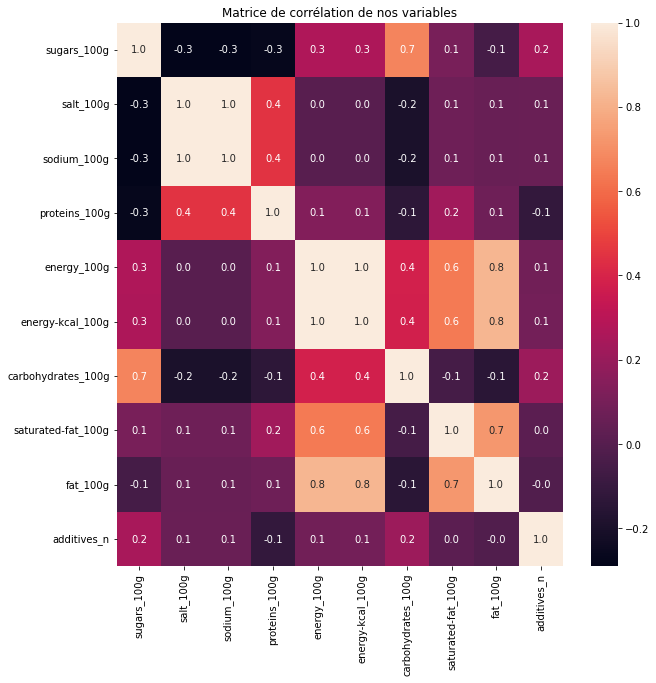

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df_copie.corr(), annot=True, fmt=".1f")
plt.title('Matrice de corrélation de nos variables')
plt.show()

Nous pouvons voir que nos 2 variables energy sont très corrélées entre elles, nous allons donc en supprimer une. De plus elles sont fortement corrélés à fat_100g, nous allons donc imputer les valeurs manquantes de cette variable via une régression linéaire avec la colonne fat_100g

In [36]:
df_copie = df_copie.drop(columns='energy-kcal_100g')

In [37]:
df_copie.isna().sum()

code                      0
product_name              0
brands                    0
pnns_groups_1             0
categories                0
main_category_en          0
countries_en              0
sugars_100g               0
salt_100g                 0
sodium_100g               0
proteins_100g             0
energy_100g            2057
carbohydrates_100g        0
saturated-fat_100g        0
fat_100g                  0
additives_n           17054
nutriscore_grade          0
nova_group                0
ecoscore_grade            0
dtype: int64

In [38]:
# Créer un objet IterativeImputer et spécifier les colonnes à utiliser pour la régression
imputer = IterativeImputer(estimator=LinearRegression(), missing_values=np.nan)
cols_to_impute = ['energy_100g', 'fat_100g']

#Imputer les valeurs à partir de la régression linéaire ebtre energy et fat
df_copie[cols_to_impute] = imputer.fit_transform(df_copie[cols_to_impute])

In [39]:
df_copie.isna().sum()

code                      0
product_name              0
brands                    0
pnns_groups_1             0
categories                0
main_category_en          0
countries_en              0
sugars_100g               0
salt_100g                 0
sodium_100g               0
proteins_100g             0
energy_100g               0
carbohydrates_100g        0
saturated-fat_100g        0
fat_100g                  0
additives_n           17054
nutriscore_grade          0
nova_group                0
ecoscore_grade            0
dtype: int64

In [40]:
#Calcul mode de ma variable additives_n pour chaque catégorie
mode_par_categorie = df_copie.groupby('pnns_groups_1')['additives_n'].apply(lambda x: x.mode()).reset_index(name='mode')
mode_par_categorie.rename(columns={'mode': 'additives_n'}, inplace=True)
mode_par_categorie

,pnns_groups_1,level_1,additives_n
0,Alcoholic beverages,0,0.0
1,Beverages,0,0.0
2,Cereals and potatoes,0,0.0
3,Composite foods,0,0.0
4,Fat and sauces,0,0.0
5,Fish Meat Eggs,0,0.0
6,Fruits and vegetables,0,0.0
7,Milk and dairy products,0,0.0
8,Salty snacks,0,0.0
9,Sugary snacks,0,1.0


In [41]:
categorie2 = df_copie['pnns_groups_1'].unique().tolist()
variables_a_traiter = ['additives_n']

for var in variables_a_traiter:
    for categ in categorie2:
            mode = df_copie.loc[df_copie['pnns_groups_1'] == categ, var].mode()[0]

            # Remplacer valeurs manquantes de la colonne additives_n 
            df_copie.loc[(df_copie['pnns_groups_1'] == categ) & (df_copie[var].isna()), var] = mode

In [42]:
df_copie.isna().sum()

code                  0
product_name          0
brands                0
pnns_groups_1         0
categories            0
main_category_en      0
countries_en          0
sugars_100g           0
salt_100g             0
sodium_100g           0
proteins_100g         0
energy_100g           0
carbohydrates_100g    0
saturated-fat_100g    0
fat_100g              0
additives_n           0
nutriscore_grade      0
nova_group            0
ecoscore_grade        0
dtype: int64

# Enregistrer le DataFrame dans un fichier CSV
df_copie.to_csv('df_nettoyage.csv', index=False)

In [48]:
df_copie['pnns_groups_1'].value_counts()

Sugary snacks              102708
Cereals and potatoes        58922
Milk and dairy products     57704
Fat and sauces              52045
Fish Meat Eggs              48138
Beverages                   41732
Composite foods             40585
Fruits and vegetables       34083
Salty snacks                21747
Alcoholic beverages            54
unknown                         0
Name: pnns_groups_1, dtype: int64

In [43]:
df_copie['code'] = df_copie['code'].apply(lambda x: str(x).encode())

In [44]:
df_copie.to_parquet('df_nettoyage.pq', index=False)